In [12]:
import numpy as np 
import numpy.random as npr
import networkx as nx
import matplotlib as plt
import plotly.graph_objects as go
import sys 
sys.path.append("./modules/")
from markov import *
import graphviz

In [13]:
# variables

alpha = 0.8
beta = 0.2
u1 = 15
u2 = 75
thinkTime = 5000
timeSlice = 3
Sio1 = 40
Sio2 = 180
qio1 = 0.65 #route to io1
qio2 = 0.25 # route to io2
qoutd = 0.1*0.4 #go to delay station
qouts = 0.1*0.6 # renter the system

In [14]:
def edge_enumerator(stage: int) -> list[tuple[State,State]]:
    nodes = stage_enumerator(stage)
    result = []
    for head in nodes:
        for tail in nodes:
            if head != tail and head.isAdjacent(tail):
                result.append((head,tail))
                pass
            pass
        pass
    return result

print(list(map(lambda x:("{}->{}".format(str(x[0]), str(x[1]))),edge_enumerator(1))))
print(list(map(lambda x:("{}->{}".format(str(x[0]), str(x[1]))),edge_enumerator(2))))

['0,0,0,3->0,0,1,2', '0,0,0,3->0,1.1,0,2', '0,0,0,3->1,0,0,2', '0,0,1,2->0,0,0,3', '0,0,1,2->0,0,2,1', '0,0,1,2->0,1.1,0,2', '0,0,1,2->0,1.1,1,1', '0,0,1,2->1,0,0,2', '0,0,1,2->1,0,1,1', '0,0,2,1->0,0,1,2', '0,0,2,1->0,0,3,0', '0,0,2,1->0,1.1,1,1', '0,0,2,1->0,1.1,2,0', '0,0,2,1->1,0,1,1', '0,0,2,1->1,0,2,0', '0,0,3,0->0,0,2,1', '0,0,3,0->0,1.1,2,0', '0,0,3,0->1,0,2,0', '0,1.1,0,2->0,0,0,3', '0,1.1,0,2->0,0,1,2', '0,1.1,0,2->0,1.1,1,1', '0,1.1,0,2->0,2.1,0,1', '0,1.1,0,2->1,0,0,2', '0,1.1,0,2->1,1.1,0,1', '0,1.1,1,1->0,0,1,2', '0,1.1,1,1->0,0,2,1', '0,1.1,1,1->0,1.1,0,2', '0,1.1,1,1->0,1.1,2,0', '0,1.1,1,1->0,2.1,0,1', '0,1.1,1,1->0,2.1,1,0', '0,1.1,1,1->1,0,1,1', '0,1.1,1,1->1,1.1,0,1', '0,1.1,1,1->1,1.1,1,0', '0,1.1,2,0->0,0,2,1', '0,1.1,2,0->0,0,3,0', '0,1.1,2,0->0,1.1,1,1', '0,1.1,2,0->0,2.1,1,0', '0,1.1,2,0->1,0,2,0', '0,1.1,2,0->1,1.1,1,0', '0,2.1,0,1->0,1.1,0,2', '0,2.1,0,1->0,1.1,1,1', '0,2.1,0,1->0,2.1,1,0', '0,2.1,0,1->0,3.1,0,0', '0,2.1,0,1->1,1.1,0,1', '0,2.1,0,1->1,2.1,0,0

legend (Delay_station,CPU.Stage,IO1,IO2)


Warning redundant edge 0,0,0,3 , 0,0,1,2 , call N 0
Warning redundant edge 0,0,0,3 , 1,0,0,2 , call N 0
Warning redundant edge 0,0,1,2 , 0,0,0,3 , call N 0
Warning redundant edge 0,0,1,2 , 0,0,2,1 , call N 0
Warning redundant edge 0,0,1,2 , 1,0,0,2 , call N 0
Warning redundant edge 0,0,1,2 , 1,0,1,1 , call N 0
Warning redundant edge 0,0,2,1 , 0,0,1,2 , call N 0
Warning redundant edge 0,0,2,1 , 0,0,3,0 , call N 0
Warning redundant edge 0,0,2,1 , 1,0,1,1 , call N 0
Warning redundant edge 0,0,2,1 , 1,0,2,0 , call N 0
Warning redundant edge 0,0,3,0 , 0,0,2,1 , call N 0
Warning redundant edge 0,0,3,0 , 1,0,2,0 , call N 0
Warning redundant edge 1,0,0,2 , 0,0,0,3 , call N 0
Warning redundant edge 1,0,0,2 , 0,0,1,2 , call N 0
Warning redundant edge 1,0,0,2 , 1,0,1,1 , call N 0
Warning redundant edge 1,0,0,2 , 2,0,0,1 , call N 0
Warning redundant edge 1,0,1,1 , 0,0,1,2 , call N 0
Warning redundant edge 1,0,1,1 , 0,0,2,1 , call N 0
Warning redundant edge 1,0,1,1 , 1,0,0,2 , call N 0
Warning redu

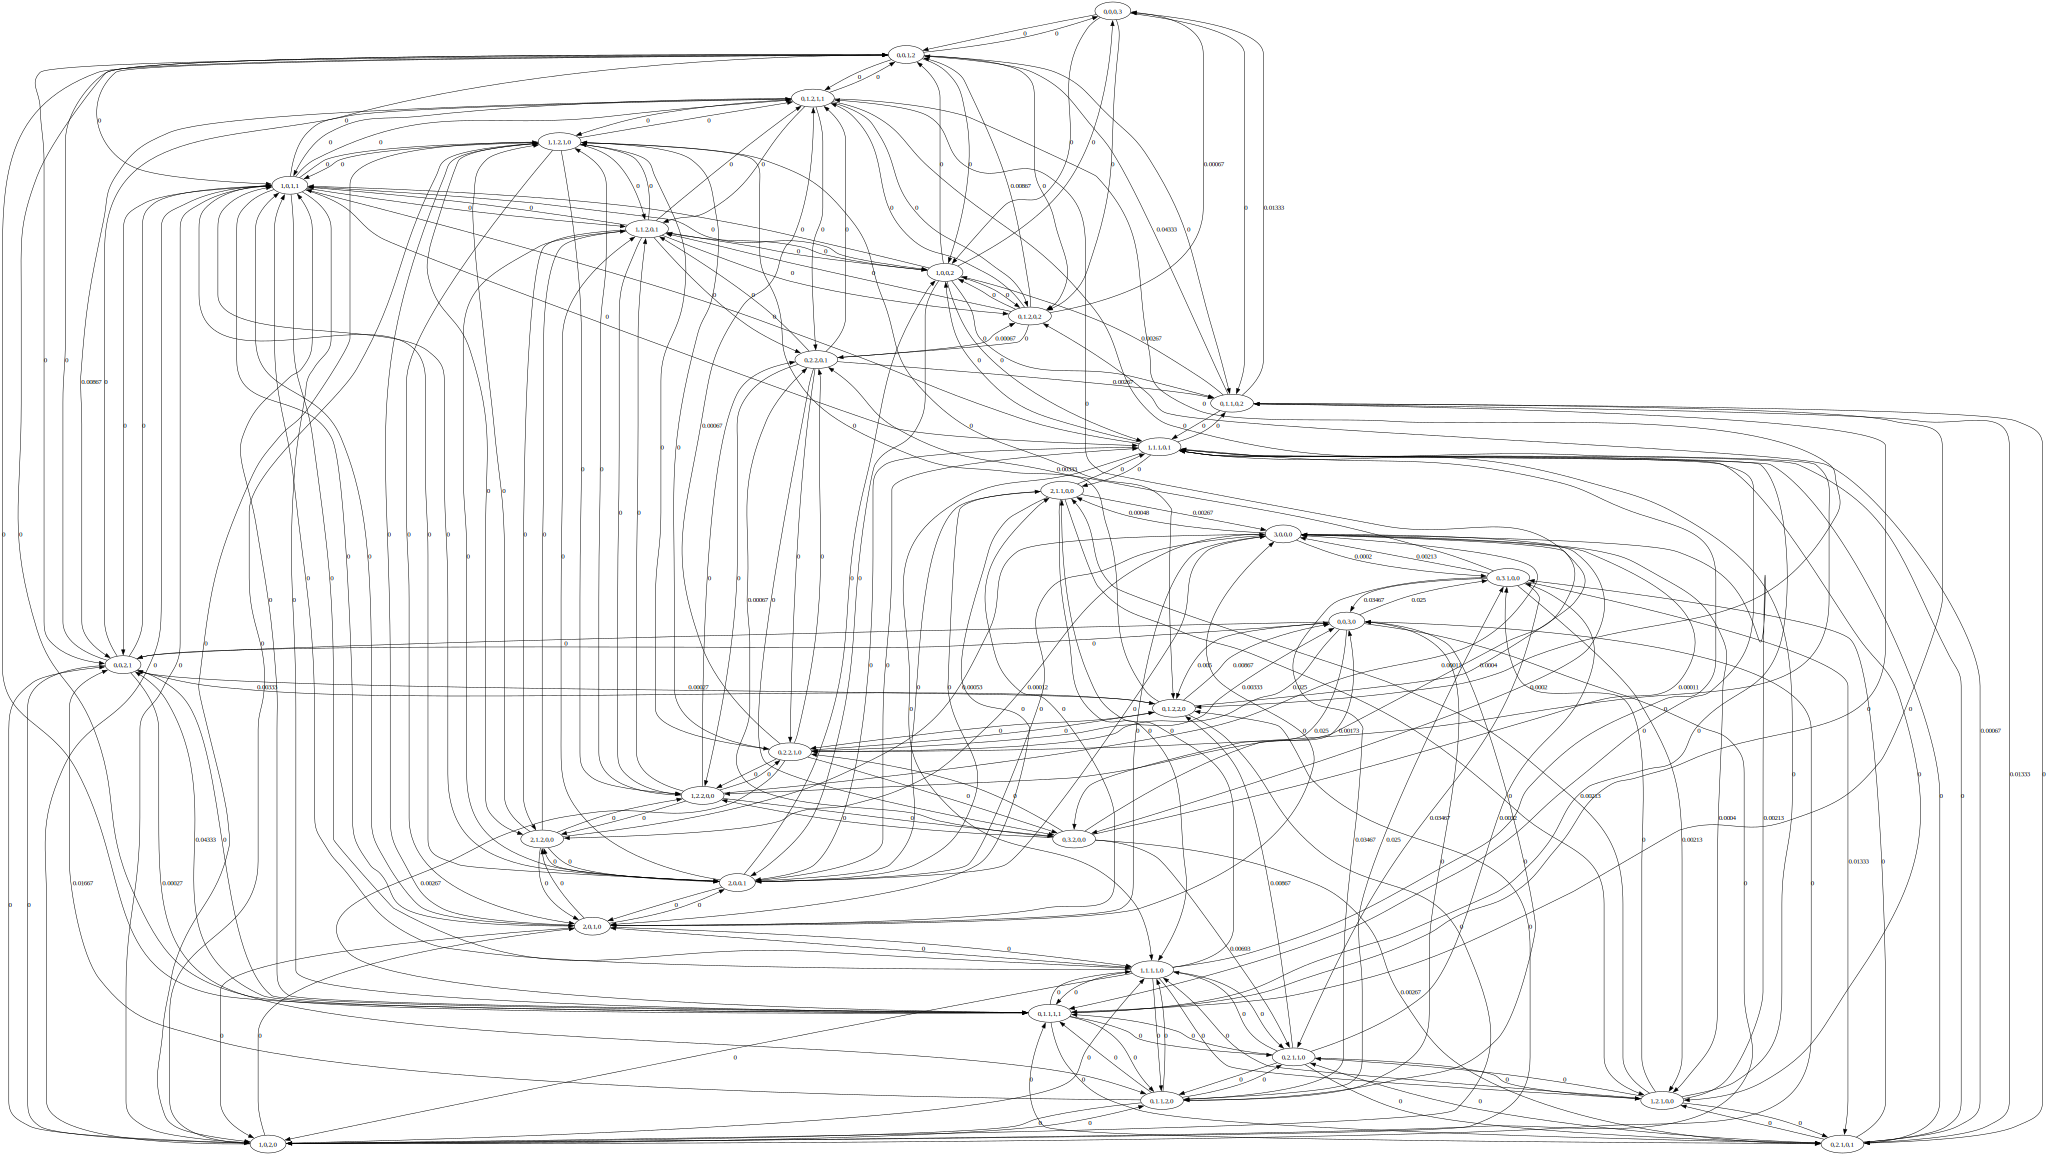

In [15]:
chain = DiGraph()

nodes = list(map(lambda x:str(x),stage_enumerator(1) + stage_enumerator(2)))
edges = edge_enumerator(1) + edge_enumerator(2)

for node in nodes:
    chain.add_node(node)
    pass

for edge in edges:
    chain.add_edge(str(edge[0]),str(edge[1]),0)
    pass

(chain
("3,0,0,0","2,1.1,0,0",(1/thinkTime)*alpha*3, (1/u1)*qoutd)
(chain.last_tail,"1,2.1,0,0",(1/thinkTime)*2,(1/u1)*qoutd*alpha)
(chain.last_tail,"0,3.1,0,0",(1/thinkTime),(1/u1)*qoutd*alpha)
("3,0,0,0","2,1.2,0,0",(1/thinkTime)*beta*3,(1/u2)*qoutd)
(chain.last_tail,"1,2.2,0,0",(1/thinkTime)*2,(1/u2)*beta*qoutd)
(chain.last_tail,"0,3.2,0,0",(1/thinkTime),(1/u2)*beta*qoutd)
("0,3.1,0,0","0,2.1,1,0", (1/u1)*alpha*qio1,(1/u1)*alpha*qouts) 
(chain.last_tail, "0,1.1,2,0", (1/u1)*alpha*qio1,(1/Sio1))
(chain.last_tail, "0,0,3,0",(1/u1)*alpha*qio1,(1/Sio1))
("0,0,3,0","0,1.2,2,0",(1/Sio1)*beta,(1/u2)*qio1)
(chain.last_tail,"0,2.2,1,0",(1/Sio1),(1/u2)*qio2)
(chain.last_tail, "0,3.2,0,0",(1/Sio1),(1/u2)*qio1*beta)
("0,3.2,0,0","0,2.1,1,0",(1/u2)*alpha*qio1)
(chain.last_tail,"0,1.2,2,0",(1/u1)*beta*qio1)
("0,3.1,0,0","0,2.1,0,1",(1/u1)*alpha*qio2)
(chain.last_tail,"0,1.1,0,2",(1/u1)*alpha*qio2)
(chain.last_tail,"0,0,0,3",(1/u1)*alpha*qio2)
("0,3.2,0,0","0,2.2,0,1",(1/u2)*beta*qio2)
(chain.last_tail,"0,1.2,0,2",(1/u2)*beta*qio2)
(chain.last_tail,"0,0,0,3",(1/u2)*beta*qio2)
("0,3.2,0,0","0,2.1,0,1",(1/u2)*alpha*qio2)
(chain.last_tail,"0,1.2,0,2",(1/u2)*beta*qio2)
("0,3.1,0,0","0,2.2,0,1",(1/u1)*beta*qio2)
(chain.last_tail,"0,1.1,0,2",(1/u2)*alpha*qio2)
("0,1.1,0,2","0,0,1,2",(1/u1)*qio1)
("0,1.2,0,2","0,0,1,2",(1/u2)*qio1)
("0,1.1,2,0","0,0,2,1",(1/u1)*qio2)
("0,1.2,2,0","0,0,2,1",(1/u2)*qio2)
("0,2.2,1,0","0,1.2,1,1",(1/u2)*beta*qio2)
("0,2.2,1,0","0,1.1,1,1", (1/u2)*alpha*qio2)
("0,1.1,1,1","0,0,2,1",(1/u1)*qio1)
("0,1.2,1,1","0,0,2,1",(1/u2)*qio1)
("0,1.1,0,2","1,0,0,2",(1/u1)*qoutd)
("1,2.1,0,0","2,1.1,0,0",(1/u1)*alpha*qoutd)
("0,3.1,0,0","1,2.1,0,0",(1/u1)*alpha*qoutd)
("0,1.2,2,0","0,0,3,0",(1/u2)*qio1)
("0,0,2,1","0,1.1,2,0",(1/Sio2)*alpha*qouts)
("0,0,2,1","0,1.2,2,0",(1/Sio2)*qouts*alpha)
)

chain.gviz()